<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-valeriaarh/blob/main/TecMty_Regresion_lineal_polinomial_A01240716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad: Regresión Lineal y Polinomial**

Ciencia y Analítica de datos

Alumna: Valeria Alejandra Ramirez Herrera

Matricula: A01240716

Profesor: Dr. María de la Paz Rico

Fecha: 09/Noviembre/2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Para hacer el notebook más estable
np.random.seed(42)


In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

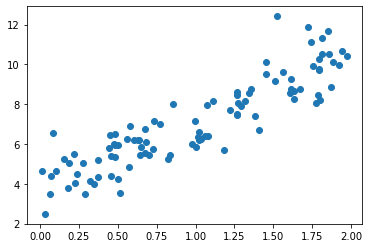

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

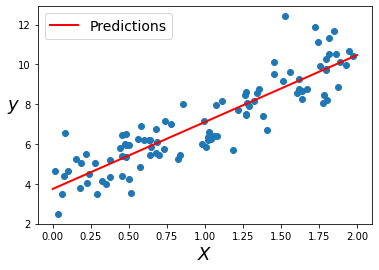

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

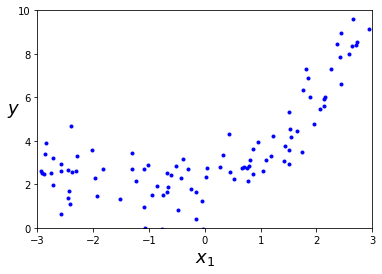

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

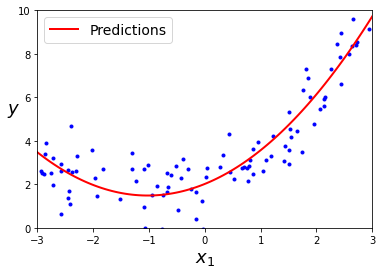

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


#**Actividad 1**

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
#Se hace la importación de las librerías:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso



In [24]:
#Se hace la importación del dataset
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
#se define la entrada y la salida
X = df[['Number of Units']]
y = df['Manufacturing Cost']

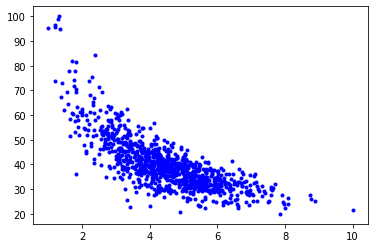

In [26]:
#Se grafican los datos sin entrenar
plt.plot(X,y,'b.');

##**Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.**

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


In [27]:
#Se hace la partición de los datos
# Datos de Prueba (test) = 20%
# Datos de entrenamiento (train) = 80%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(X_test.shape, ': dimensión de datos de entrada para prueba')  

print(y_train.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(y_test.shape, ': dimensión de variable de salida para prueba')

(800, 1) : dimensión de datos de entrada para entrenamiento y validación
(200, 1) : dimensión de datos de entrada para prueba
(800,) : dimensión de variable de salida para entrenamiento y validación
(200,) : dimensión de variable de salida para prueba


**Regresión Lineal.**

- Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Modelo de Regresión Lineal generado: y= [-6.21850698] x + 67.89012908512075

Error medio Absoluto (MAE): 4.513943834797746
Root Mean Squared Error: 5.932738736518161
R^2_score 0.5695897011831419


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


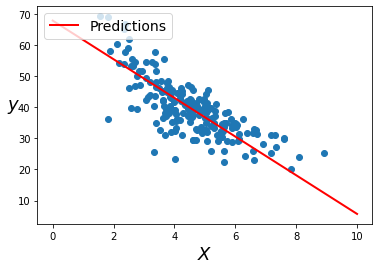

In [28]:
#Se hace el entrenamiento del modelo Lineal
LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(X_train, y_train)

#Se crean las predicciones
X_fit = np.linspace(0, 10, 1000)
y_fit = LinReg.predict(X_fit[:, np.newaxis])


#Se crea la gráfica
plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

print("Modelo de Regresión Lineal generado: y=",LinReg.coef_,"x +",LinReg.intercept_)


#Se calculan los errores de MAE, MSE y R^2
y_pred = LinReg.predict(X_test)
MAE_Linear=metrics.mean_absolute_error(y_test,y_pred)
R2_Linear=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2_score', r2_score(y_test, y_pred))


**Regresión Polinomial.**

- Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

Modelo de Regresión Polinomial generado: = 1.2718195213149832 x2 + -17.81636965261764 x + 92.03582034949117

Error Medio Absoluto (MAE): 4.372292708304972
Root Mean Squared Error (RMSE): 5.764249049866789
r2_score 0.5936898412489064


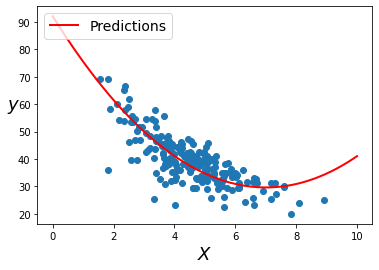

In [29]:
#Ahora para este ejercicio se va a trabajar con un Polinomio por lo que se usa 'PolinomyialFeatures' para transformar los datos de entrenamiento
#como se hizo en el ejercicio de ejemplo, el grado del polinomio será de 2.

poly_transform = PolynomialFeatures(degree=2, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
PR = LinearRegression(fit_intercept=True)
PR.fit(polyX, y_train)

y_pred = PR.predict(polyX)

#Se crean las predicciones
X_fit = np.linspace(0, 10, 1000).reshape(1000,1)
polyX_fit = poly_transform.fit_transform(X_fit)
polyX_fit
y_fit = PR.predict(polyX_fit)


#Se crea la gráfica
plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

print("Modelo de Regresión Polinomial generado: =",PR.coef_[1],"x2 +",PR.coef_[0],"x +",PR.intercept_)



#Se calculan los errores de MAE, RMSE y R^2
polyX = poly_transform.fit_transform(X_test)
y_pred = PR.predict(polyX)
R2_Poli=r2_score(y_test,y_pred)
MAE_Poli=metrics.mean_absolute_error(y_test,y_pred)
print('\nError Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))




- Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.


Error medio Absoluto (MAE): 4.243752236506559
Root Mean Squared Error (RMSE): 5.582202608314778
r2_score 0.6189487433093005


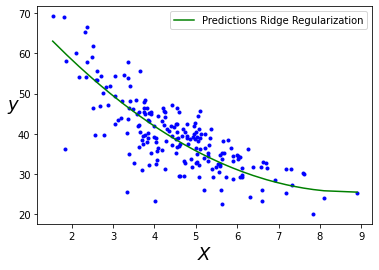

In [30]:
#Se crea un Pipeline del modelo de regresión polinomial para trabajar con RIDGE.

pipe_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 10, solver = 'auto', random_state = 42))])

pipe_ridge.fit(X_train, y_train)

#Se hacen las predicciones
y_pred = pipe_ridge.predict(X_test)
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]


#Se crea la gráfica
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);


#Se calculan los errores de MAE, RMSE y R^2
MAE_Ridge=metrics.mean_absolute_error(y_test,y_pred)
R2_Ridge=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.409e+04, tolerance: 9.574e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Error medio Absoluto (MAE): 4.2663686376905945
Root Mean Squared Error (RMSE): 5.65606473714832
r2_score 0.6087981041982056


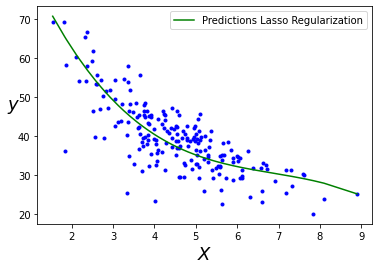

In [31]:
#Se crea un Pipeline del modelo de regresión polinomial para trabajar con LASSO.

pipe_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 0.0001, random_state = 42))])
pipe_lasso.fit(X_train, y_train)


#Se hacen las predicciones
y_pred = pipe_lasso.predict(X_test)
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]


#Se crea la gráfica
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);


#Se calculan los errores de MAE, RMSE y R^2
MAE_Lasso=metrics.mean_absolute_error(y_test,y_pred)
R2_Lasso=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

**Finalmente grafica :**

MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

In [32]:
#Se crea la función diagrama para la gráfica de las métricas
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

#Se crea la lista de las métricas
Metricas = list()
Metricas.append('Lineal')
Metricas.append('Polynomial')
Metricas.append('Ridge')
Metricas.append('Lasso')



MAE
[4.513943834797746, 4.372292708304972, 4.243752236506559, 4.2663686376905945]


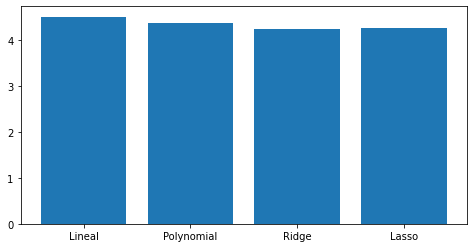

In [33]:
#Se crea la lista para graficar el MAE de las 4 métricas
MAE = list()
MAE.append(MAE_Linear)
MAE.append(MAE_Poli)
MAE.append(MAE_Ridge)
MAE.append(MAE_Lasso)

fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)
plt.show()

R2
[0.5695897011831419, 0.5936898412489064, 0.6189487433093005, 0.6087981041982056]


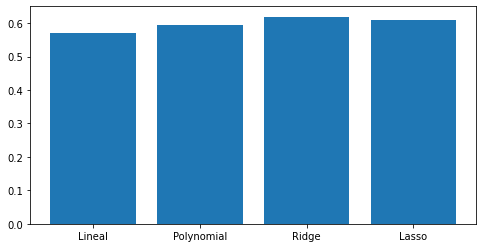

In [34]:
#Se crea la lista para graficar el R^2 de las 4 métricas
R2 = list()
R2.append(R2_Linear)
R2.append(R2_Poli)
R2.append(R2_Ridge)
R2.append(R2_Lasso)

fig, ax = plt.subplots(figsize =(8, 4))
print("R2")
print(R2)
R2=list(R2)
plt.bar(Metricas,R2)
plt.show()

**Explica tus resultados**
- Qué método se aproxima mejor, ¿por que?
  - Como se puede ver en las gráficas, a pesar de los 4 modelos tienen valores similares, se puede concluir que el mejor modelo es Ridge ya que es el que tiene el menor error en MAE y el mayor R^2.
- ¿Qué porcentajes de entrenamiento y evaluación? 
  - La partición de los datos fue de 80/20 ya que así se tomó el ejemplo durante clase. Pero también se hicieron pruebas con el 60/40, y 70/30 y arrojaba valores similares, una partición 90/10 ya no se hizo para no crear un desbalanceo.
- ¿Qué error tienes?, ¿es bueno?, ¿Cómo lo sabes?
  - Error MAE - 4.24: este error fue el menor de todos, y al momento de representarlo en la gráfica hace sentido ya que se hace una buena representación del modelo y las diferencias entre la predicción y los reales se ve menor que en el modelo lineal y el polinomial.
  - R^2 - 0.619: a diferencia del MAE, aquí se busca un valor cercano a 1, en este caso el valor mayor fue de Ridge, indicando que la relación o correlación entre las variables es alta, no es la mejor ya solo estamos hablando de 61%.




##**Ejercicio 2: Regresión múltiple**



Encuentra el mejor regresor para los datos de las casas:



In [35]:
#Se hace la importación del dataset de los datos de las casas
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [36]:
#Se toma la información del dataset para ver las variables que maneja
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [37]:
#Se sacan las métricas estadísticas del dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [38]:
#Se quitan las variables que no tienen relación a la búsqueda de casas
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

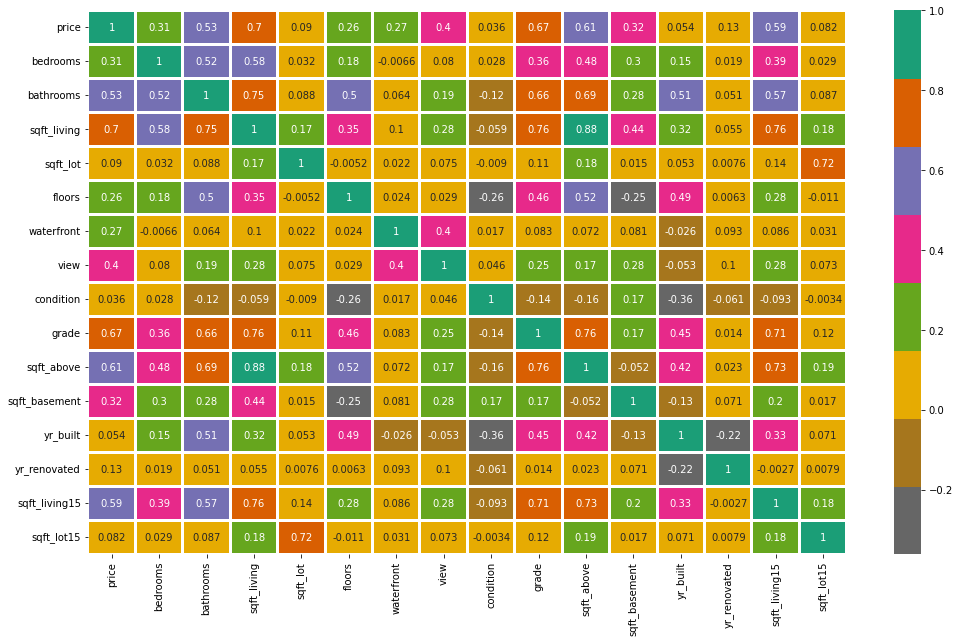

In [39]:
#Se forma la tabla de correlación entre las variables
plt.figure(figsize=(17,10)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [40]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

**Divide los datos. Utiliza la función train_test_split**

In [41]:
#Se hace la partición de los datos
# Datos de Prueba (test) = 10%
# Datos de entrenamiento (train) = 90%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


**Regresión Múltiple Lineal.**

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [42]:
#Se crea el modelo Lineal

LinReg = LinearRegression(fit_intercept=True)
LinReg.fit(X_train, y_train)

print("Regresión Lineal\n")

#Se calculan los errores de MAE, RMSE y R^2
y_pred = LinReg.predict(X_test)
MAE_Linear=metrics.mean_absolute_error(y_test,y_pred)
R2_Linear=r2_score(y_test,y_pred)
print('\nError Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 score', r2_score(y_test, y_pred))



Regresión Lineal


Error Medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error (RMSE): 232133.3676240749
R^2 score 0.6579723205007814


**Regresión Múltiple Polinomial.**

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

**Nota**: en la plataforma se nos indicó que solo se solicitaban los errores

In [43]:
#Ahora para este ejercicio se va a trabajar con un Polinomio por lo que se usa 'PolinomyialFeatures' para transformar los datos de entrenamiento
#como se hizo en el ejercicio de ejemplo, el grado del polinomio será de 2.

poly_transform = PolynomialFeatures(degree=2, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
PoliReg = LinearRegression(fit_intercept=True)
PoliReg.fit(polyX, y_train)


print("Regresión Polinomial\n")

#Se calculan los errores de MAE, RMSE y R^2
polyX = poly_transform.fit_transform(X_test)
y_pred = PoliReg.predict(polyX)
R2_Poli=r2_score(y_test,y_pred)
MAE_Poli=metrics.mean_absolute_error(y_test,y_pred)
print('\nError Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 score',r2_score(y_test, y_pred ))



Regresión Polinomial


Error Medio Absoluto (MAE): 121314.06948173394
Root Mean Squared Error (RMSE): 186261.28575138954
R^2 score 0.7797929072570198


**Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

**Nota**: en la plataforma se nos indicó que solo se solicitaban los errores

In [44]:
Ridge_PoliReg=Ridge(alpha = 10, solver = 'auto', random_state = 42)
Ridge_PoliReg.fit(X_train,y_train)
y_pred=Ridge_PoliReg.predict(X_test)


print("Penalización Ridge")

##Se calculan los errores de MAE, RMSE y R^2

MAE_Ridge=metrics.mean_absolute_error(y_test,y_pred)
R2_Ridge=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 score', r2_score(y_test, y_pred))



Penalización Ridge

Error medio Absoluto (MAE): 137585.19973837206
Root Mean Squared Error (RMSE): 232447.74672687982
R^2 score 0.6570452743997186


In [45]:
Lasso_PoliReg=Lasso(alpha = 10,random_state = 42, max_iter=10000)
Lasso_PoliReg.fit(X_train,y_train)
y_pred=Lasso_PoliReg.predict(X_test)


print("Penalización Lasso")

##Se calculan los errores de MAE, RMSE y R^2
MAE_Lasso=metrics.mean_absolute_error(y_test,y_pred)
R2_Lasso=r2_score(y_test,y_pred)
print('\nError medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 score', r2_score(y_test, y_pred))



Penalización Lasso

Error medio Absoluto (MAE): 137484.46604257842
Root Mean Squared Error: 232144.99192258547
R^2 score 0.6579380649223365


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.054e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


**Finalmente grafica :**
    
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)

MAE
[137480.1388273178, 121314.06948173394, 137585.19973837206, 137484.46604257842]


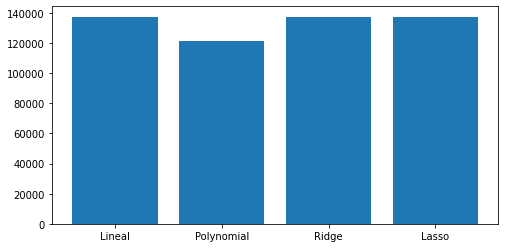

In [46]:
#Se crea la lista para graficar el MAE de las 4 métricas
MAE = list()
MAE.append(MAE_Linear)
MAE.append(MAE_Poli)
MAE.append(MAE_Ridge)
MAE.append(MAE_Lasso)


fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

R^2
[0.6579723205007814, 0.7797929072570198, 0.6570452743997186, 0.6579380649223365]


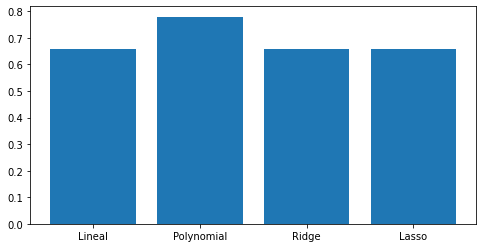

In [47]:
#Se crea la lista para graficar el R^2 de las 4 métricas
R2 = list()
R2.append(R2_Linear)
R2.append(R2_Poli)
R2.append(R2_Ridge)
R2.append(R2_Lasso)

fig, ax = plt.subplots(figsize=(8, 4))
print("R^2")
print(R2)
R2 = list(R2)
plt.bar(Metricas, R2)

plt.show()

**Explica tus resultados**
- Qué método se aproxima mejor, ¿por que?
  - Como se puede ver en las gráficas, los resultados de los 4 modelos tienen valores similares, pero se puede concluir que el mejor modelo es el Polinomial ya que es el que tiene el menor error en MAE y el mayor R^2.
- ¿Qué porcentajes de entrenamiento y evaluación? 
  - Al igual en el ejercicio 1, la partición de los datos fue de 80/20 ya que así se tomó el ejemplo durante clase. Pero también se hicieron pruebas con el 60/40, y 70/30 y arrojaba valores similares, una partición 90/10 ya no se hizo para no crear un desbalanceo.
- ¿Qué error tienes?, ¿es bueno?, ¿Cómo lo sabes?
  - Error MAE - 121314.06: a pesar del número grande que se ve, este error fue el menor de todos, en este caso no pudo ser representado ya que se tienen en consideración alrededor de 14 variables.
  - R^2 - 0.779: a diferencia del MAE, aquí se busca un valor cercano a 1, en este caso el valor mayor fue de Ridge, indicando que la relación o correlación entre las variables es alta, no es un buen porcentaje después de todo, ya que estamos hablando de un 77% correlación pero al final es el mejor de los 4 modelos.




**Agrega las conclusiones**

En conclusión para ambos ejercicios, para este ejercicio se puede ver que la regresión lineal no tiene mucha relevancia para la aproximación del modelo, sus errores son altos y los puntos en las gráficas están muy separados. 
La regresión Lineal se usa para predecir de una variable de respuesta a partir de una variable predictora, es decir una variable dependiente.

Mientras que la regresión Polinomial se refiere a lo mismo de de la regresión líneal pero un a función de grado n, mayor a 1.

La lineal mútiple, que fue la del ejercicio 2, fue donde vimos un cambio ya que teníamos más variables predictoras. 

Ambos ejercicios, siempre funcionó mejor el modelo Polinomial, uno con penalización y otro sin penalización. Las estimaciones en ambos modelos con estos métodos es por las aproximaciones que se realizan.

Al final, si queremos un mejor resultado creo que se podría intentar trabajar con un polinomio de grado mayor y ver si la aproximación del modelo funciona mejor, pero hay que cuidar el sobre entrenamiento.